In [222]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.artist as artist
import matplotlib.patches as patches
from functools import *
from math import *
import pandas as pd
import time
from IPython import display

%matplotlib inline

In [223]:
plt.style.use('ggplot')

In [224]:
size = 4

numNodes = 10
c_v = 0.01

############## ranges subject to change ###########
# communication range
r = 2
# sensing range
r_s = 3

# generate random points
points = size*np.random.rand(2, numNodes)

In [225]:
########################### build graph #########################

# add edge to graph (adding neighbors)
def addEdge(graph, pointIndex, neighborIndex):
    if pointIndex in graph:
        graph[pointIndex].append(neighborIndex)
    else:
        graph[pointIndex] = [neighborIndex]

def distance(point1, point2):
    (x1, y1) = point1
    (x2, y2) = point2
    return (x1-x2)**2+(y1-y2)**2

# go through all nodes to see if neighbor
def findNeighbors(nodeIndex, n, q):
    
    neighborList = []
    q_i = np.array(q[nodeIndex-1]).ravel()

    centerX, centerY = q_i[0], q_i[1]
    for j in range(nodeIndex, n):
        q_j = np.array(q[j]).ravel()
        pointX, pointY = q_j[0], q_j[1]
        if distance((centerX, centerY), (pointX, pointY)) < r**2:
            neighborList.append(j+1)
    return neighborList

# dict[node number] = [neighbors]
# nodes with neighbors
def buildGraph(n, q):
    global fignum
    
    graph = dict()
    
    for i in range(1, n+1):
        centerIndex = i
        q_i = np.array(q[i-1]).ravel()
        centerX, centerY = q_i[0], q_i[1]
        neighbors = findNeighbors(centerIndex, n, q)
        for neighborIndex in neighbors:
            neighbor = neighborIndex-1
            
            q_j = np.array(q[neighbor]).ravel()
            
            pointX, pointY = q_j[0], q_j[1]
            # 3. Link sensor node with neighbor
            plt.plot([centerX, pointX], [centerY, pointY], color='b')
            # add 2 edges for undirected graph
            addEdge(graph, centerIndex, neighborIndex)
            addEdge(graph, neighborIndex, centerIndex)   
        if centerIndex not in graph:
            graph[centerIndex] = []
    
    return graph

def showSensorNodeGraph(x, y, n):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.add_patch(patches.Rectangle((2, 2), .5, .5))
    
    # q: node positions in matrix form
    q = np.column_stack((x, y))
    q = list(map(np.matrix, q))
    
    plt.scatter(x, y,
                marker='>',
                color='magenta')
    # find neighbors for each node
    return buildGraph(n, q)

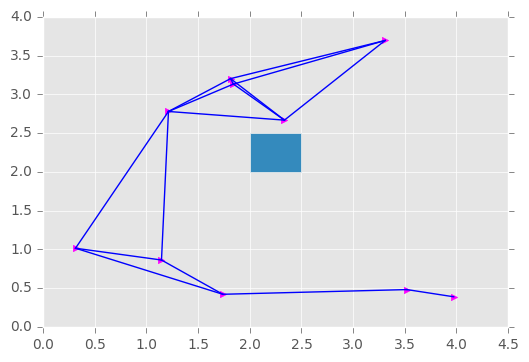

In [226]:
nodes = showSensorNodeGraph(points[0], points[1], numNodes)

In [227]:
#################### Supplemental Functions ########################

def readField(filename):
    rows = []
    F = []
    file = open(filename,"r")
    lines = file.readlines()
    
    for i in range(25):
        row = []
        for i in range(5):
            index = 1+(26*i)
            vals = lines[index]
            vals = list(map(float, vals.split()))
            row += vals
        rows.append(row)
    
    return rows

# 25 x 25
F = readField("Scalar_Field_data.txt")


def euclideanNorm(q_i, q_j):
    return sqrt(np.sum(np.square(np.subtract(q_i, q_j))))

def sigmaNorm(z, epsilon):
    return 1/epsilon*(sqrt(1+epsilon*(z**2))-1)

# Noise variance model
def V_ik_t(q_i, q_ck):
    z = euclideanNorm(q_i, q_ck)
    if z <= r_s:
        return z**2+c_v/r_s**2
    else:
        return 0

V1 = []
# noise
n1 = []
# node measurements
m1 = []

V = []
n = []
m = []

groundTruthMeasurement = 50
groundTruthLoc = [2, 2]
    
# Add noise, N = 10
def measurement():
    
    # q: node positions in matrix form
    q = np.column_stack((points[0], points[1]))
    q = list(map(np.matrix, q))
    q_mean = reduce(np.add, q)/numNodes
    
    for i in range(numNodes):
        V1.append(((np.linalg.norm(np.subtract(q[i], q_mean))**2)+c_v)/(r_s**2))
        n1.append(np.random.normal(0.0, V1[i]))
        m1.append(groundTruthMeasurement + n1[i])
        
# observation at cell k at time step t based on its own confidence
# (weight) - cell weight
measurement()
m.append(m1)
n.append(n1)
V.append(V1)

In [228]:
########################### CASE 1 ################################
############ Estimate single cell (single scalar value) ###########

# iniital 
#k = 1
consensus = []
consensus.append(measurement)

def compute_c1_w():
    numerator = 2*c_v
    N = numNodes-1
    denominator = N*r_s**2
    return numerator/denominator

import random
def random_float(low, high):
    return random.random()*(high-low) + low

c1_w = random_float(0,compute_c1_w())
    
def weightDesign_1():
    print(m)
    


weightDesign_1()
# every time step change topology - make sure connectivity is 1

[[50.06147339649019, 50.46843449923863, 49.070273420417706, 49.8380878926037, 49.86833157873791, 50.142045283305066, 50.283286341012044, 50.01442673432738, 49.65934873896305, 50.21847973580779]]
